In [69]:
import pm4py

### Read

In [ ]:
log = pm4py.read_xes("3_modified.xes")

parsing log, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

In [90]:
log

concept:name  \
0        Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
1               GC/SampledObjectAllocation_{System.String}   
2        Procfiler/MethodStart_{Interop+Advapi32.EventA...   
3        Procfiler/MethodEnd_{Interop+Advapi32.EventAct...   
4                GC/SampledObjectAllocation_{ActivityInfo}   
...                                                    ...   
2341769  Method/LoadVerbose_{Microsoft.CodeAnalysis.Com...   
2341770  Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
2341771  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Co...   
2341772  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CS...   
2341773  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CS...   

                          time:timestamp  ManagedThreadId  NativeThreadId  \
0       2025-01-10 20:01:47.093946+00:00            25452           25452   
1       2025-01-10 20:01:47.094202+00:00            25452           25452   
2       2025-01-10 20:01:47.094207+00:00            25452           25452   
3       2025-01-10 20:01:47.094208+00:00            25452           25452   
4       2025-01-10 20:01:47.094209+00:00            25452           25452   
...                                  ...              ...             ...   
2341769 2025-01-10 20:03:37.599570+00:00               -1           18968   
2341770 2025-01-10 20:03:37.599576+00:00            18968           18968   
2341771 2025-01-10 20:03:37.599580+00:00            18968           18968   
2341772 2025-01-10 20:03:37.599580+00:00            18968           18968   
2341773 2025-01-10 20:03:37.599581+00:00            18968           18968   

               QpcStamp case:concept:name  \
0        13371926562902                 1   
1        13371926565460                 1   
2        13371926565514                 1   
3        13371926565518                 1   
4        13371926565530                 1   
...                 ...               ...   
2341769  13373031606221                12   
2341770  13373031606272                12   
2341771  13373031606318                12   
2341772  13373031606321                12   
2341773  13373031606324                12   

                                          concept:instance  \
0                                                      NaN   
1                                                      NaN   
2                                                      NaN   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
2341769  MethodLoadUnload_Microsoft.CodeAnalysis.Comman...   
2341770                                                NaN   
2341771                                                NaN   
2341772                                                NaN   
2341773                                                NaN   

        lifecycle:transition  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
...                      ...  
2341769                start  
2341770                  NaN  
2341771                  NaN  
2341772                  NaN  
2341773                  NaN  

[2341774 rows x 8 columns]

In [95]:
procfiler = (log["concept:name"].str.startswith("Procfiler/") & log["concept:name"].str.contains("{Microsoft.CodeAnalysis"))
gc = log["concept:name"].str.startswith("GC/")
print(f'Procfiler: {sum(procfiler)}, GC: {sum(gc)}')

Procfiler: 1919608, GC: 144667


In [96]:
trace6 = (log["case:concept:name"] == '6')

In [ ]:
log_min = log[procfiler].reset_index(drop = True)
log_min.sort_values(by = "time:timestamp")

concept:name  \
0        Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
1        Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
2        Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
3        Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Co...   
4        Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
...                                                    ...   
1919602  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Co...   
1919604  Procfiler/MethodStart_{Microsoft.CodeAnalysis....   
1919606  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CS...   
1919605  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.Co...   
1919607  Procfiler/MethodEnd_{Microsoft.CodeAnalysis.CS...   

                          time:timestamp  ManagedThreadId  NativeThreadId  \
0       2025-01-10 20:01:47.093946+00:00            25452           25452   
1       2025-01-10 20:01:47.211562+00:00            25452           25452   
2       2025-01-10 20:01:47.213322+00:00            25452           25452   
3       2025-01-10 20:01:47.213431+00:00            25452           25452   
4       2025-01-10 20:01:47.213751+00:00            25452           25452   
...                                  ...              ...             ...   
1919602 2025-01-10 20:03:37.599533+00:00            18968           18968   
1919604 2025-01-10 20:03:37.599576+00:00            18968           18968   
1919606 2025-01-10 20:03:37.599580+00:00            18968           18968   
1919605 2025-01-10 20:03:37.599580+00:00            18968           18968   
1919607 2025-01-10 20:03:37.599581+00:00            18968           18968   

               QpcStamp case:concept:name concept:instance  \
0        13371926562902                 1              NaN   
1        13371927739067                 1              NaN   
2        13371927756660                 1              NaN   
3        13371927757750                 1              NaN   
4        13371927760957                 1              NaN   
...                 ...               ...              ...   
1919602  13373031605843                12              NaN   
1919604  13373031606272                12              NaN   
1919606  13373031606321                12              NaN   
1919605  13373031606318                12              NaN   
1919607  13373031606324                12              NaN   

        lifecycle:transition  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
...                      ...  
1919602                  NaN  
1919604                  NaN  
1919606                  NaN  
1919605                  NaN  
1919607                  NaN  

[1919608 rows x 8 columns]

In [124]:
import re
item = 'Procfiler/MethodStart_{Microsoft.CodeAnalysis.CSharp.BinderFactory+BinderCacheKey.System.IEquatable<Microsoft.CodeAnalysis.CSharp.BinderFactory.BinderCacheKey>.Equals}'

a = re.sub(r'\[(.*)\]', '', item)
b = re.sub(r'\`(\d*)', '', a)
b = re.sub(r'[\+\.]\<[^\}]*', '', b)
b = re.sub(r'\<(.*)\>', '', b)
print(b)

c = re.search(r'Procfiler\/Method(Start|End)\_\{Microsoft\.CodeAnalysis\.([a-zA-Z0-9\.\+\_]*)\}', b)
c.group(1), c.group(2)

Procfiler/MethodStart_{Microsoft.CodeAnalysis.CSharp.BinderFactory+BinderCacheKey.System.IEquatable.Equals}


('Start', 'CSharp.BinderFactory+BinderCacheKey.System.IEquatable.Equals')

In [125]:
import re
import tqdm

log_better = log_min.copy()

names = [ ]
for item in tqdm.tqdm(log_better["concept:name"].to_numpy()):
    item = re.sub(r'\[(.*)\]', '', item)
    item = re.sub(r'\`(\d*)', '', item)
    item = re.sub(r'[\+\.]\<[^\}]*', '', item)
    item = re.sub(r'\<(.*)\>', '', item)
    res = re.search(r'Procfiler\/Method(Start|End)\_\{Microsoft\.CodeAnalysis\.([a-zA-Z0-9\.\+\_]*)\}', item)

    if res is None:
        print(item)
        names.append(item)
    else:
        names.append(f"{res.group(1)}:{res.group(2)}")

log_better["concept:name"] = names
log_better

100%|██████████| 1919608/1919608 [00:06<00:00, 304484.18it/s]


concept:name  \
0                    Start:CSharp.CommandLine.Program.Main   
1                Start:CSharp.CommandLine.Program.MainCore   
2             Start:CommandLine.CompilerServerLogger..ctor   
3               End:CommandLine.CompilerServerLogger..ctor   
4        Start:CommandLine.BuildClient.GetCompileOnServ...   
...                                                    ...   
1919603                    End:CommandLine.BuildClient.Run   
1919604     Start:CommandLine.CompilerServerLogger.Dispose   
1919605       End:CommandLine.CompilerServerLogger.Dispose   
1919606            End:CSharp.CommandLine.Program.MainCore   
1919607                End:CSharp.CommandLine.Program.Main   

                          time:timestamp  ManagedThreadId  NativeThreadId  \
0       2025-01-10 20:01:47.093946+00:00            25452           25452   
1       2025-01-10 20:01:47.211562+00:00            25452           25452   
2       2025-01-10 20:01:47.213322+00:00            25452           25452   
3       2025-01-10 20:01:47.213431+00:00            25452           25452   
4       2025-01-10 20:01:47.213751+00:00            25452           25452   
...                                  ...              ...             ...   
1919603 2025-01-10 20:03:37.599533+00:00            18968           18968   
1919604 2025-01-10 20:03:37.599576+00:00            18968           18968   
1919605 2025-01-10 20:03:37.599580+00:00            18968           18968   
1919606 2025-01-10 20:03:37.599580+00:00            18968           18968   
1919607 2025-01-10 20:03:37.599581+00:00            18968           18968   

               QpcStamp case:concept:name concept:instance  \
0        13371926562902                 1              NaN   
1        13371927739067                 1              NaN   
2        13371927756660                 1              NaN   
3        13371927757750                 1              NaN   
4        13371927760957                 1              NaN   
...                 ...               ...              ...   
1919603  13373031605845                12              NaN   
1919604  13373031606272                12              NaN   
1919605  13373031606318                12              NaN   
1919606  13373031606321                12              NaN   
1919607  13373031606324                12              NaN   

        lifecycle:transition  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
...                      ...  
1919603                  NaN  
1919604                  NaN  
1919605                  NaN  
1919606                  NaN  
1919607                  NaN  

[1919608 rows x 8 columns]

In [127]:
log_better["concept:name"].value_counts()

concept:name
Start:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                      58589
End:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                        58589
Start:GreenNode.get_RawKind                                              49664
End:GreenNode.get_RawKind                                                49664
End:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.get_Kind               42019
                                                                         ...  
Start:CSharp.Syntax.InternalSyntax.SwitchExpressionSyntax..ctor              1
End:CSharp.Syntax.InternalSyntax.SwitchExpressionSyntax..ctor                1
End:CSharp.Syntax.InternalSyntax.ContextAwareSyntax.SwitchExpression         1
End:CSharp.Syntax.InternalSyntax.LanguageParser.ParseSwitchExpression        1
End:CSharp.Syntax.ClassDeclarationSyntax.get_Keyword                         1
Name: count, Length: 5886, dtype: int64

In [128]:
import tqdm
import numpy
import pandas

def filter(event_log):
    event_log = event_log.copy()
    event_log_list = []
    for row in tqdm.tqdm(event_log.iterrows(), total = len(event_log)):
        event_log_list.append(row[1].to_dict())


    edges_in = {}
    edges_out = {}
    for i in tqdm.trange(len(event_log_list) - 1):
        if event_log_list[i]["case:concept:name"] != event_log_list[i + 1]["case:concept:name"]:
            continue

        cur_text = event_log_list[i]["concept:name"]
        next_text = event_log_list[i + 1]["concept:name"]

        if cur_text not in edges_out:
            edges_out[cur_text] = set()
        edges_out[cur_text].add(next_text)

        if next_text not in edges_in:
            edges_in[next_text] = set()
        edges_in[next_text].add(cur_text)
        
        if cur_text not in edges_in:
            edges_in[cur_text] = set()
        if next_text not in edges_out:
            edges_out[next_text] = set()


    edges_in_count = {}
    for key, value in edges_in.items():
        edges_in_count[key] = len(value)
    print(numpy.unique(list(edges_in_count.values()), return_counts = True))
    
    edges_out_count = {}
    for key, value in edges_out.items():
        edges_out_count[key] = len(value)
    print(numpy.unique(list(edges_out_count.values()), return_counts = True))
        
    i = 0
    pbar = tqdm.trange(0, len(event_log_list))
    pbar_iter = iter(pbar)
    while i < len(event_log_list) - 1:
        cur_event = event_log_list[i]
        next_event = event_log_list[i + 1]
        if cur_event["case:concept:name"] != next_event["case:concept:name"]:
            i += 1
            next(pbar_iter)
            continue

        exactly_one_out = (len(edges_out[cur_event['concept:name']]) == 1)
        exactly_one_in = (len(edges_in[next_event['concept:name']]) == 1)
        
        if not exactly_one_out or not exactly_one_in:
            i += 1
            next(pbar_iter)
            continue

        new_name = cur_event['concept:name'] + "\n" + next_event['concept:name']

        if new_name not in edges_in:
            edges_in[new_name] = set()
        edges_in[new_name] = edges_in[new_name].union(edges_in[cur_event['concept:name']])
        
        if new_name not in edges_out:
            edges_out[new_name] = set()
        edges_out[new_name] = edges_out[new_name].union(edges_out[next_event['concept:name']])

        event_log_list[i]['concept:name'] = new_name
        del event_log_list[i + 1]
        pbar.total = len(event_log_list)

    return pandas.DataFrame(event_log_list)

In [129]:
log_min_filt = filter(log_better)
log_min_filt

100%|██████████| 1919607/1919607 [00:00<00:00, 2063853.72it/s]


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        27,  28,  29,  30,  31,  32,  34,  39,  55,  58,  59,  73, 130,
       147]), array([   1, 4260,  843,  340,  146,   74,   50,   38,   17,   15,   20,
          8,    8,    8,    6,    3,    5,    3,    5,    2,    2,    2,
          3,    4,    1,    2,    4,    2,    2,    1,    1,    1,    2,
          1,    1,    1,    1,    1,    1,    1], dtype=int64))
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  24,  25,  26,
        27,  28,  32,  33,  38,  40,  51,  53,  59,  66,  67,  70, 123,
       165]), array([   1, 4333,  777,  323,  145,   83,   42,   40,   27,   12,   19,
         15,    5,   10,    6,    2,    5,    4,    2,    4,    3,    2,
          3,    3,    1,    2,    1,    3,    1,    1,    1,    2,    1,
          1,    1,    1,    1,    1,

100%|█████████▉| 1375086/1375088 [05:32<00:00, 4134.12it/s] 


concept:name  \
0        Start:CSharp.CommandLine.Program.Main\nStart:C...   
1                            Start:CommandLine.BuildClient   
2                              End:CommandLine.BuildClient   
3        End:CommandLine.BuildClient.GetCompileOnServer...   
4        Start:RuntimeHostInfo.get_IsCoreClrRuntime\nEn...   
...                                                    ...   
1375083                       End:PooledObjects.ObjectPool   
1375084                             End:DiagnosticBag.Free   
1375085  End:CommonCompiler.RunCore\nEnd:CommonCompiler...   
1375086                         End:CSharp.CommandLine.Csc   
1375087  End:CommandLine.ConsoleUtil.RunWithUtf8Output\...   

                          time:timestamp  ManagedThreadId  NativeThreadId  \
0       2025-01-10 20:01:47.093946+00:00            25452           25452   
1       2025-01-10 20:01:47.213788+00:00            25452           25452   
2       2025-01-10 20:01:47.213795+00:00            25452           25452   
3       2025-01-10 20:01:47.213799+00:00            25452           25452   
4       2025-01-10 20:01:47.215063+00:00            25452           25452   
...                                  ...              ...             ...   
1375083 2025-01-10 20:03:37.599445+00:00            18968           18968   
1375084 2025-01-10 20:03:37.599445+00:00            18968           18968   
1375085 2025-01-10 20:03:37.599445+00:00            18968           18968   
1375086 2025-01-10 20:03:37.599454+00:00            18968           18968   
1375087 2025-01-10 20:03:37.599454+00:00            18968           18968   

               QpcStamp case:concept:name  concept:instance  \
0        13371926562902                 1               NaN   
1        13371927761324                 1               NaN   
2        13371927761394                 1               NaN   
3        13371927761431                 1               NaN   
4        13371927774072                 1               NaN   
...                 ...               ...               ...   
1375083  13373031604962                12               NaN   
1375084  13373031604964                12               NaN   
1375085  13373031604966                12               NaN   
1375086  13373031605053                12               NaN   
1375087  13373031605056                12               NaN   

         lifecycle:transition  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  
...                       ...  
1375083                   NaN  
1375084                   NaN  
1375085                   NaN  
1375086                   NaN  
1375087                   NaN  

[1375088 rows x 8 columns]

In [132]:
log_min_filt["concept:name"].value_counts()

concept:name
Start:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags\nEnd:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                                     58589
Start:GreenNode.get_RawKind\nEnd:GreenNode.get_RawKind                                                                                     49664
End:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.get_Kind                                                                                 42019
Start:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.get_Kind                                                                               42019
Start:GreenNode+NodeFlagsAndSlotCount.set_NodeFlags\nEnd:GreenNode+NodeFlagsAndSlotCount.set_NodeFlags                                     34110
                                                                                                                                           ...  
Start:CSharp.Syntax.InternalSyntax.LanguageParser.ParseElseClauseOpt                                                 

In [134]:
pm4py.write_xes(log_min_filt, "log_better_filt.xes")

exporting log, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

In [142]:
value_counts_normalized = log_min_filt['concept:name'].value_counts(normalize=True)
value_counts_normalized

concept:name
Start:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags\nEnd:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                                     4.260745e-02
Start:GreenNode.get_RawKind\nEnd:GreenNode.get_RawKind                                                                                     3.611696e-02
End:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.get_Kind                                                                                 3.055732e-02
Start:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.get_Kind                                                                               3.055732e-02
Start:GreenNode+NodeFlagsAndSlotCount.set_NodeFlags\nEnd:GreenNode+NodeFlagsAndSlotCount.set_NodeFlags                                     2.480569e-02
                                                                                                                                               ...     
Start:CSharp.Syntax.InternalSyntax.LanguageParser.ParseElseClauseOpt       

In [145]:
# Определим значения, которые занимают более 1%
values_above_threshold = value_counts_normalized[value_counts_normalized >= 0.01].index

# Отфильтруем исходный DataFrame, сохраняя только те строки, где 'concept:name' выше порога
filtered_log = log_min_filt[log_min_filt['concept:name'].isin(values_above_threshold)]
filtered_log['concept:name'].value_counts(normalize=True)

concept:name
Start:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags\nEnd:GreenNode+NodeFlagsAndSlotCount.get_NodeFlags                                                       0.088636
Start:GreenNode.get_RawKind\nEnd:GreenNode.get_RawKind                                                                                                       0.075134
Start:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.get_Kind                                                                                                 0.063568
End:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.get_Kind                                                                                                   0.063568
Start:GreenNode+NodeFlagsAndSlotCount.set_NodeFlags\nEnd:GreenNode+NodeFlagsAndSlotCount.set_NodeFlags                                                       0.051603
End:GreenNode.SetFlags                                                                                                                                       

In [172]:
event_log_list = []
for row in tqdm.tqdm(filtered_log.iterrows(), total = len(filtered_log)):
    event_log_list.append(row[1].to_dict())

100%|██████████| 661009/661009 [00:18<00:00, 34885.40it/s]


In [173]:
i = 0
pbar = tqdm.trange(0, len(event_log_list))
pbar_iter = iter(pbar)
while i < len(event_log_list) - 1:
    cur_event = event_log_list[i]
    next_event = event_log_list[i + 1]
    if cur_event["case:concept:name"] != next_event["case:concept:name"]:
        i += 1
        next(pbar_iter)
        continue
    
    if cur_event["concept:name"] == next_event["concept:name"]:
        del event_log_list[i + 1]
        pbar.total = len(event_log_list)
        continue

    i += 1
    next(pbar_iter)

filtered_log_filt = pandas.DataFrame(event_log_list)

  0%|          | 157/626589 [00:54<60:57:20,  2.85it/s]


In [174]:
filtered_log_filt

concept:name                   time:timestamp  \
0       Start:PooledObjects.ArrayBuilder 2025-01-10 20:01:47.311432+00:00   
1         End:PooledObjects.ArrayBuilder 2025-01-10 20:01:47.311902+00:00   
2       Start:PooledObjects.ArrayBuilder 2025-01-10 20:01:47.312591+00:00   
3         End:PooledObjects.ArrayBuilder 2025-01-10 20:01:47.313712+00:00   
4       Start:PooledObjects.ArrayBuilder 2025-01-10 20:01:47.314285+00:00   
...                                  ...                              ...   
628776    End:Collections.SegmentedArray 2025-01-10 20:03:37.598479+00:00   
628777  Start:Collections.SegmentedArray 2025-01-10 20:03:37.598480+00:00   
628778    End:Collections.SegmentedArray 2025-01-10 20:03:37.598480+00:00   
628779  Start:Collections.SegmentedArray 2025-01-10 20:03:37.598480+00:00   
628780    End:Collections.SegmentedArray 2025-01-10 20:03:37.598481+00:00   

        ManagedThreadId  NativeThreadId        QpcStamp case:concept:name  \
0                 25452           25452  13371928737765                 1   
1                 25452           25452  13371928742461                 1   
2                 25452           25452  13371928749351                 1   
3                 25452           25452  13371928760559                 1   
4                 25452           25452  13371928766291                 1   
...                 ...             ...             ...               ...   
628776            18968           18968  13373031595308                12   
628777            18968           18968  13373031595314                12   
628778            18968           18968  13373031595320                12   
628779            18968           18968  13373031595321                12   
628780            18968           18968  13373031595326                12   

        concept:instance  lifecycle:transition  \
0                    NaN                   NaN   
1                    NaN                   NaN   
2                    NaN                   NaN   
3                    NaN                   NaN   
4                    NaN                   NaN   
...                  ...                   ...   
628776               NaN                   NaN   
628777               NaN                   NaN   
628778               NaN                   NaN   
628779               NaN                   NaN   
628780               NaN                   NaN   

                        start_timestamp  
0      2025-01-10 20:01:47.311432+00:00  
1      2025-01-10 20:01:47.311902+00:00  
2      2025-01-10 20:01:47.312591+00:00  
3      2025-01-10 20:01:47.313712+00:00  
4      2025-01-10 20:01:47.314285+00:00  
...                                 ...  
628776 2025-01-10 20:03:37.598479+00:00  
628777 2025-01-10 20:03:37.598480+00:00  
628778 2025-01-10 20:03:37.598480+00:00  
628779 2025-01-10 20:03:37.598480+00:00  
628780 2025-01-10 20:03:37.598481+00:00  

[628781 rows x 9 columns]

### Cluster

In [6]:
import sklearn.cluster
a = pm4py.cluster_log(
    log_min, sklearn.cluster.KMeans()
)
[ e for e in a ]

KeyboardInterrupt: 

### Variants

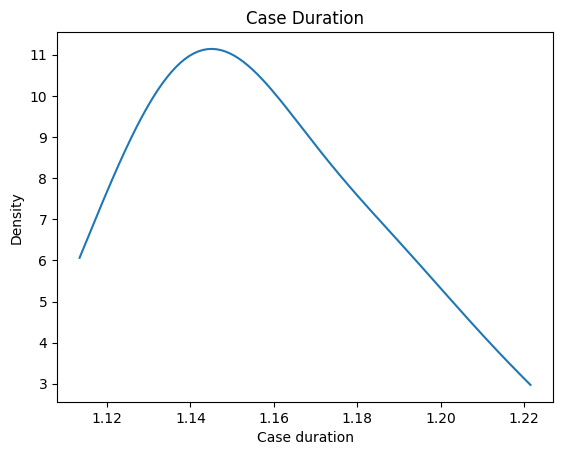

In [ ]:
pm4py.view_case_duration_graph(log_min)

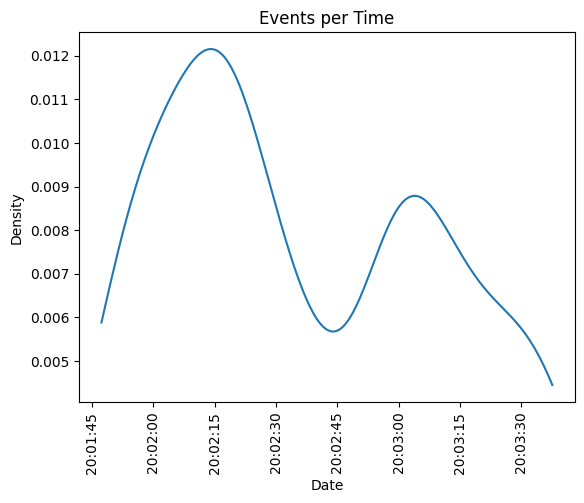

In [ ]:
pm4py.view_events_per_time_graph(log_min)

In [9]:
pm4py.get_frequent_trace_segments(log_min, min_occ = 60)

Counter()

### DFG

In [177]:
dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_log_filt)

a = list(dfg.values())
a.sort()
a[-100:]

[2,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 5,
 12,
 13,
 16,
 17,
 20,
 24,
 26,
 28,
 33,
 36,
 41,
 53,
 53,
 57,
 57,
 72,
 72,
 72,
 74,
 89,
 94,
 97,
 100,
 100,
 107,
 120,
 122,
 150,
 154,
 211,
 217,
 220,
 238,
 265,
 269,
 273,
 306,
 468,
 477,
 524,
 702,
 720,
 743,
 1093,
 1113,
 1120,
 1128,
 1134,
 1224,
 1231,
 1455,
 1787,
 1845,
 3648,
 3816,
 4930,
 5593,
 8751,
 10033,
 10980,
 11279,
 14740,
 14740,
 14758,
 14758,
 14840,
 15291,
 15291,
 16923,
 16923,
 17043,
 17718,
 18376,
 18376,
 18376,
 19041,
 19817,
 21277,
 24479,
 24479,
 25629,
 34010,
 34010,
 34110,
 42019,
 42019]

In [147]:
threshold = 0
filtered_dfg = {k: v for k, v in dfg.items() if v >= threshold}
len(filtered_dfg)

102

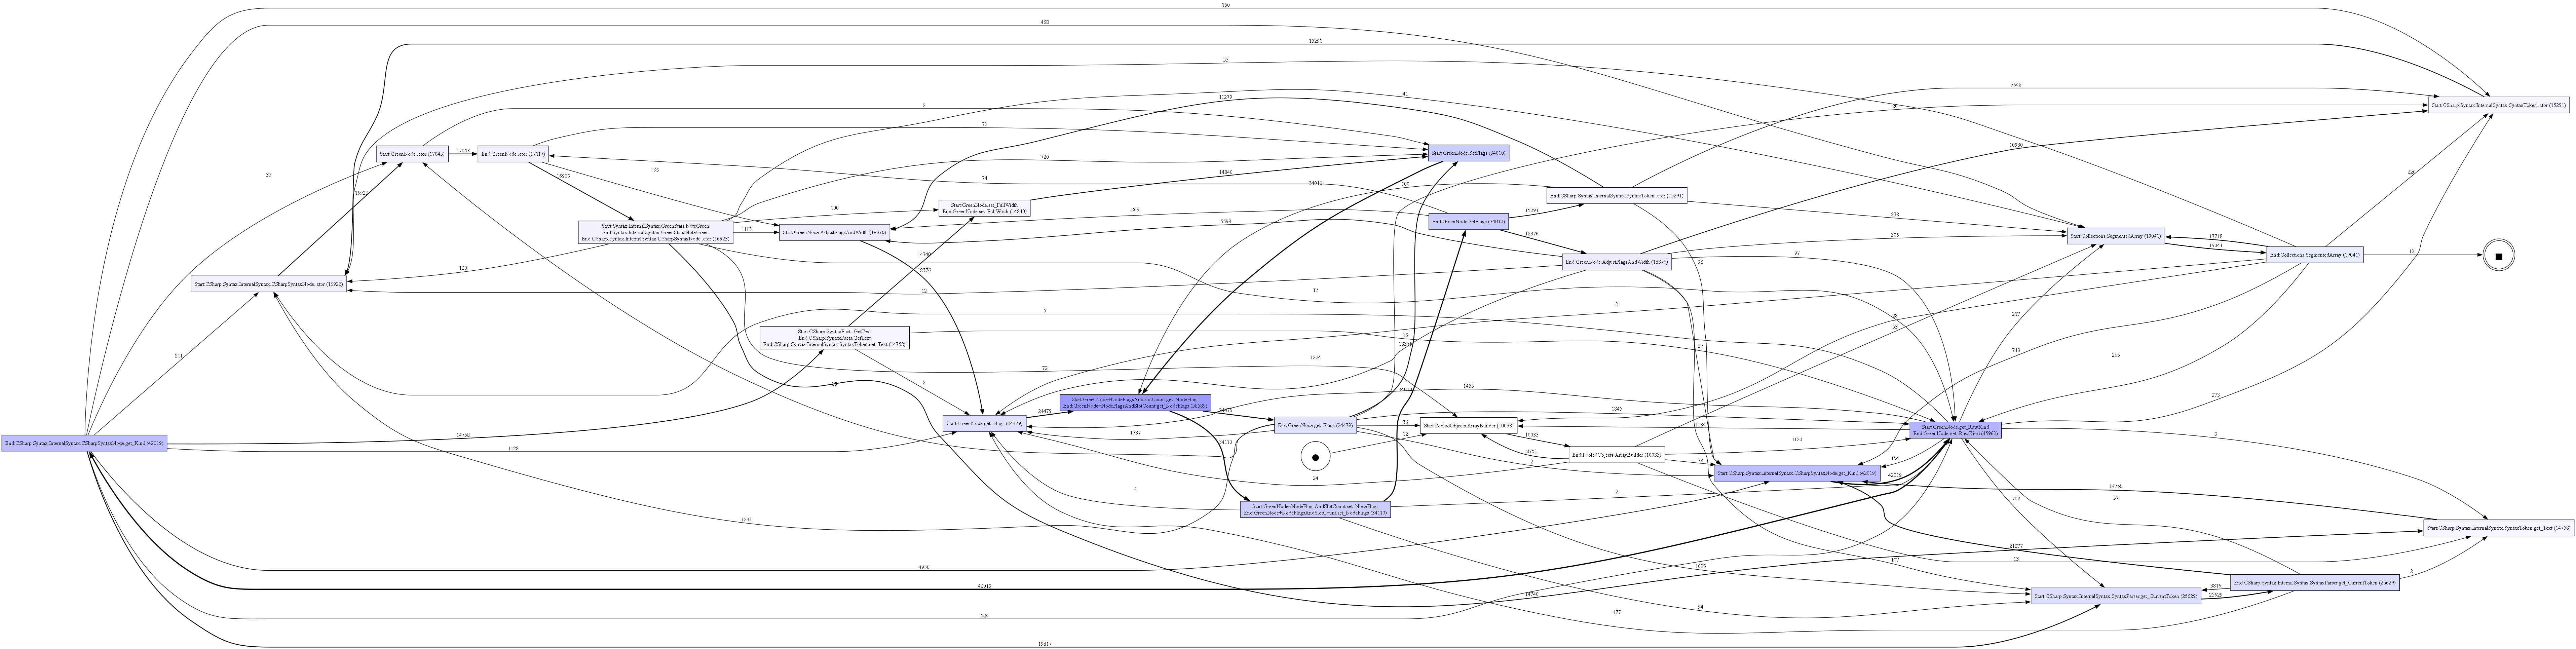

In [178]:
pm4py.view_dfg(dfg, start_activities, end_activities)

### Heuristic net

In [170]:
{k: v for k, v in dfg.items() if k[1] == 'Start:Collections.SegmentedArray'}

{('End:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode.get_Kind',
  'Start:Collections.SegmentedArray'): 468,
 ('End:CSharp.Syntax.InternalSyntax.SyntaxToken..ctor',
  'Start:Collections.SegmentedArray'): 238,
 ('End:Collections.SegmentedArray', 'Start:Collections.SegmentedArray'): 17718,
 ('End:GreenNode.AdjustFlagsAndWidth',
  'Start:Collections.SegmentedArray'): 306,
 ('End:PooledObjects.ArrayBuilder', 'Start:Collections.SegmentedArray'): 53,
 ('Start:Collections.SegmentedArray',
  'Start:Collections.SegmentedArray'): 8978,
 ('Start:GreenNode.get_RawKind\nEnd:GreenNode.get_RawKind',
  'Start:Collections.SegmentedArray'): 217,
 ('Start:Syntax.InternalSyntax.GreenStats.NoteGreen\nEnd:Syntax.InternalSyntax.GreenStats.NoteGreen\nEnd:CSharp.Syntax.InternalSyntax.CSharpSyntaxNode..ctor',
  'Start:Collections.SegmentedArray'): 41}

In [175]:
map = pm4py.discover_heuristics_net(
    filtered_log_filt, 
    dependency_threshold = 0,
    and_threshold = 0,
    loop_two_threshold = 0,
    min_act_count = 0,
    min_dfg_occurrences = 0
)

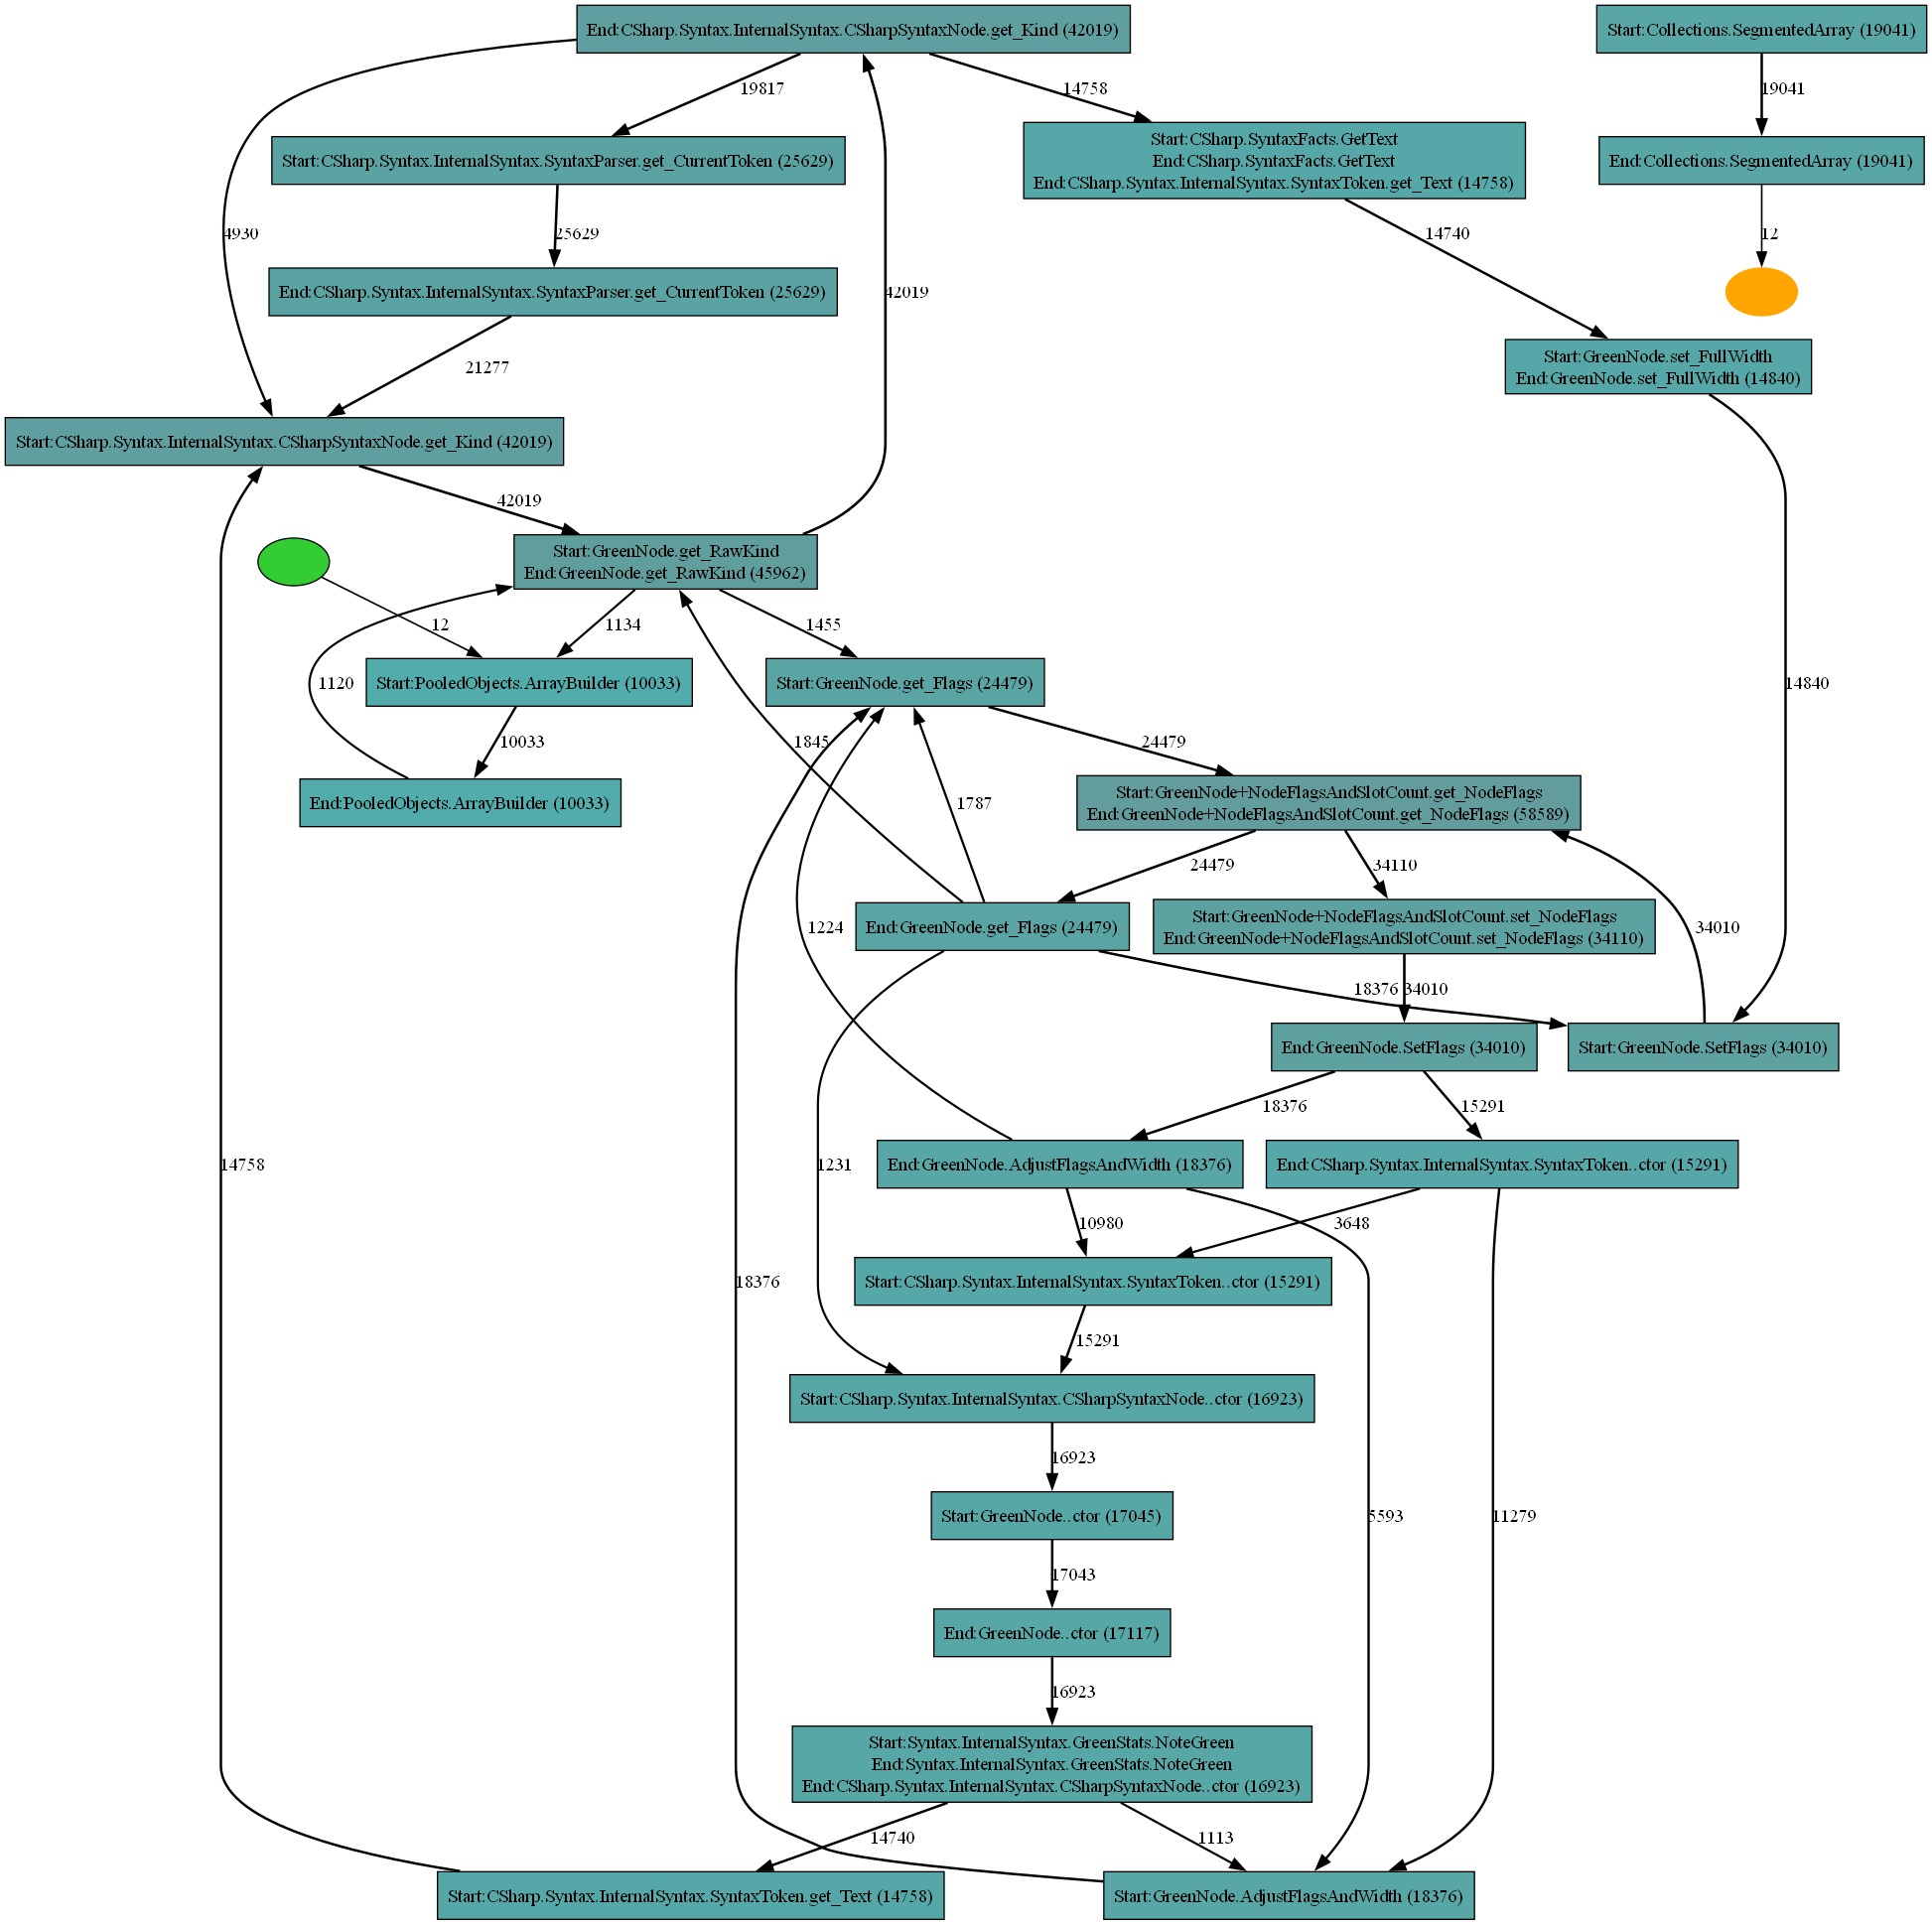

In [176]:
pm4py.view_heuristics_net(map)

### Petri net

In [136]:
dfg = pm4py.discover_dfg_typed(log_min2)

In [43]:
from collections import Counter

my_dict = {k: v for k, v in dfg.graph.items() if v >= 5000 or k[0] in dfg.start_activities or k[1] in dfg.end_activities}
dfg._graph = Counter(my_dict)

In [137]:
dfg.start_activities

Counter({'Procfiler/MethodStart_{Interop+Advapi32.EventActivityIdControl[int32..(value.class.ActivityControl,value.class.System.Guid&)]}': 12})

In [138]:
len(dfg.graph)

2918

In [10]:
process_tree = pm4py.discover_bpmn_inductive(log_start, noise_threshold = 0.5)

KeyboardInterrupt: 

In [ ]:
pm4py.view_petri_net(*process_tree)

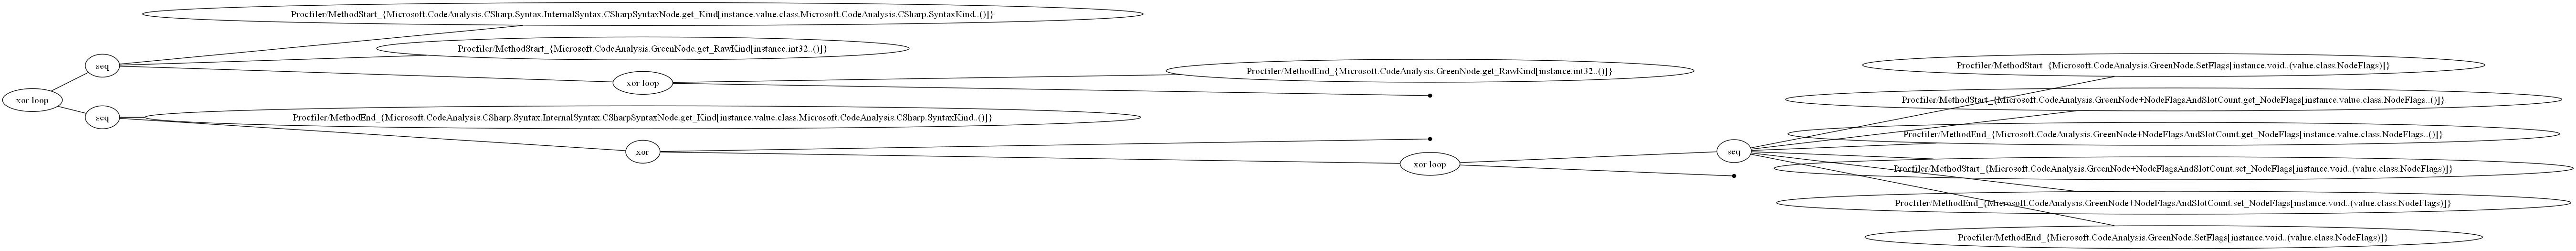

In [149]:
pm4py.view_process_tree(process_tree)

In [12]:
bpmn = pm4py.discover_bpmn_inductive(log_start, noise_threshold = 0.5)

KeyboardInterrupt: 

In [ ]:
pm4py.write_bpmn(bpmn, "bpmn.bpmn")

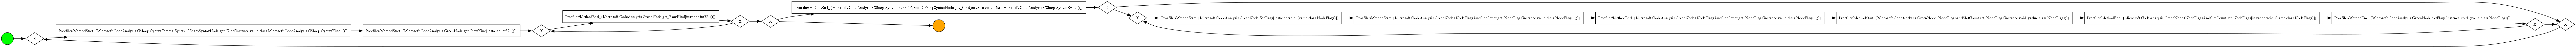

In [ ]:
pm4py.view_bpmn(bpmn)

In [165]:
filtered_log["case:concept:name"].value_counts()

case:concept:name
4     123751
2      55797
9      53979
10     53157
7      49799
8      49799
3      49544
5      47365
11     45669
1      45282
6      44523
12     42344
Name: count, dtype: int64

In [166]:
filtered_log[filtered_log["case:concept:name"] == '12']

concept:name                   time:timestamp  \
1298742  Start:PooledObjects.ArrayBuilder 2025-01-10 20:03:36.633904+00:00   
1298743  Start:PooledObjects.ArrayBuilder 2025-01-10 20:03:36.633952+00:00   
1298744  Start:PooledObjects.ArrayBuilder 2025-01-10 20:03:36.633992+00:00   
1298745  Start:PooledObjects.ArrayBuilder 2025-01-10 20:03:36.634200+00:00   
1298746  Start:PooledObjects.ArrayBuilder 2025-01-10 20:03:36.634261+00:00   
...                                   ...                              ...   
1374953  Start:Collections.SegmentedArray 2025-01-10 20:03:37.598480+00:00   
1374955    End:Collections.SegmentedArray 2025-01-10 20:03:37.598480+00:00   
1374956  Start:Collections.SegmentedArray 2025-01-10 20:03:37.598480+00:00   
1374958    End:Collections.SegmentedArray 2025-01-10 20:03:37.598481+00:00   
1374959    End:Collections.SegmentedArray 2025-01-10 20:03:37.598481+00:00   

         ManagedThreadId  NativeThreadId        QpcStamp case:concept:name  \
1298742            18968           18968  13373021949561                12   
1298743            18968           18968  13373021950036                12   
1298744            18968           18968  13373021950436                12   
1298745            18968           18968  13373021952518                12   
1298746            18968           18968  13373021953128                12   
...                  ...             ...             ...               ...   
1374953            18968           18968  13373031595316                12   
1374955            18968           18968  13373031595320                12   
1374956            18968           18968  13373031595321                12   
1374958            18968           18968  13373031595326                12   
1374959            18968           18968  13373031595327                12   

         concept:instance  lifecycle:transition  \
1298742               NaN                   NaN   
1298743               NaN                   NaN   
1298744               NaN                   NaN   
1298745               NaN                   NaN   
1298746               NaN                   NaN   
...                   ...                   ...   
1374953               NaN                   NaN   
1374955               NaN                   NaN   
1374956               NaN                   NaN   
1374958               NaN                   NaN   
1374959               NaN                   NaN   

                         start_timestamp  
1298742 2025-01-10 20:03:36.633904+00:00  
1298743 2025-01-10 20:03:36.633952+00:00  
1298744 2025-01-10 20:03:36.633992+00:00  
1298745 2025-01-10 20:03:36.634200+00:00  
1298746 2025-01-10 20:03:36.634261+00:00  
...                                  ...  
1374953 2025-01-10 20:03:37.598480+00:00  
1374955 2025-01-10 20:03:37.598480+00:00  
1374956 2025-01-10 20:03:37.598480+00:00  
1374958 2025-01-10 20:03:37.598481+00:00  
1374959 2025-01-10 20:03:37.598481+00:00  

[42344 rows x 9 columns]

In [167]:
process_tree = pm4py.discover_process_tree_inductive(filtered_log[filtered_log["case:concept:name"] == '12'], multi_processing = False)

KeyboardInterrupt: 

In [26]:
pm4py.view_process_tree(process_tree)

In [ ]:
ts = pm4py.discover_transition_system(log_min)

In [ ]:
declare_model = pm4py.discover_declare(log_min, min_support_ratio = 0.9, min_confidence_ratio = 0.9)
declare_model

In [ ]:
pm4py.conformance_declare(log_min[:100], declare_model)

In [ ]:
pm4py.get_end_activities(log)

In [ ]:
log_min = log.groupby('case:concept:name')
log_min

In [ ]:
pm4py.petri_net

In [ ]:
log_min = log[~log["concept:instance"].isna()].groupby('case:concept:name').head(1000)
log_min

In [ ]:
petri_net = pm4py.discover_process_tree_inductive(log_min, multi_processing = True, noise_threshold = 0.7)

petri_net

KeyboardInterrupt: 

In [ ]:
pm4py.view_petri_net(petri_net)

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log_min)

In [ ]:
pm4py.view_dfg(dfg, start_activities, end_activities)

In [ ]:
map = pm4py.discover_heuristics_net(log_min)

In [ ]:
pm4py.view_heuristics_net(map)

In [ ]:
process_tree = pm4py.petri_net(log_min, multi_processing = True)

process_tree